In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [14]:
def sigmoid(x):
  # Наша функция активации: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

In [15]:
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Умножаем входы на веса, прибавляем порог, затем используем функцию активации
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

In [16]:
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
n.feedforward(x)    # 0.9990889488055994

0.9990889488055994

In [17]:
class OurNeuralNetwork:

  def __init__(self):

    # Веса
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Пороги
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):

    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def predict_(self, height, body_weight):
    param = np.array([height - 135, body_weight - 66])
    if network.feedforward(param) <= 0.5:
      print('YOU, М')
      return int(round(network.feedforward(param),0))
    else:
      print('YOU, Ж')
      return math.ceil(network.feedforward(param))

  def train(self, data, all_y_trues):
    '''
    - data - массив numpy (n x 2) numpy, n = к-во наблюдений в наборе.
    - all_y_trues - массив numpy с n элементами.
      Элементы all_y_trues соответствуют наблюдениям в data.
    '''
    learn_rate = 0.1
    epochs = 1000 # сколько раз пройти по всему набору данных
    np.loss_array = []
    # len_chart_epochs = 10
    epoch_array = np.arange(1, 11)


    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Прямой проход (эти значения нам понадобятся позже)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Считаем частные производные.
        # --- Имена: d_L_d_w1 = "частная производная L по w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Нейрон o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Нейрон h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Нейрон h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Обновляем веса и пороги
        # Нейрон h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Нейрон h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Нейрон o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Считаем полные потери в конце каждой эпохи
      if epoch % 100 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        # print("Epoch %d loss: %.3f" % (epoch, loss))
        loss_array = np.loss_array
        np.loss_array.append(loss)




    plt.plot (epoch_array, loss_array)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('losses at the end of each epoch')
    plt.show()

In [18]:
def mse_loss(y_true, y_pred):
  # y_true и y_pred - массивы numpy одинаковой длины.
  return ((y_true - y_pred) ** 2).mean()

In [19]:
def deriv_sigmoid(x):
  # Производная сигмоиды: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

In [20]:
# Определим набор данных
data = np.array([
  [-2, -1],  # Алиса
  [25, 6],   # Боб
  [17, 4],   # Чарли
  [-15, -6], # Диана
])
all_y_trues = np.array([
  1, # Алиса
  0, # Боб
  0, # Чарли
  1, # Диана
])


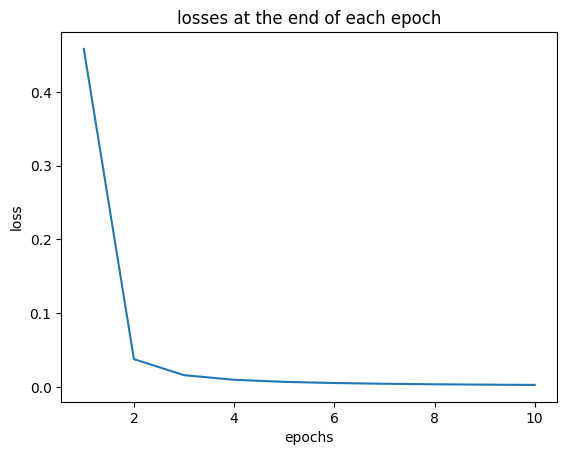

In [21]:
network = OurNeuralNetwork()
network.train(data, all_y_trues)


In [24]:
preds_ = np.preds_ = []
for i in range(len(all_y_trues)):

  height = int(input('Specify the height: '))
  body_weight = int(input('Specify the body weight: '))

  preds_.append(network.predict_(height, body_weight))
  print(np.preds_)
accuracu_ =  accuracy_score(all_y_trues, np.preds_)
print(f'{accuracu_= }')
accuracu_ =  accuracy_score(all_y_trues, np.preds_, normalize=False)
print(f'{accuracu_= }')

Specify the height: 156
Specify the body weight: 60
YOU, М
[0]
Specify the height: 182
Specify the body weight: 65
YOU, М
[0, 0]
Specify the height: 189
Specify the body weight: 95
YOU, М
[0, 0, 0]
Specify the height: 175
Specify the body weight: 80
YOU, М
[0, 0, 0, 0]
accuracu_= 0.5
2
